In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Algorithms to try - 

- KNN
- Adaboost / XGboost / Catboost
- ANN

In [3]:
df=pd.read_csv('/home/jupyter/churn&cluster_03_29_23.csv')

In [4]:
df=df.drop("Unnamed: 0", axis=1)
df.dropna(subset = ['churn'],inplace = True)

In [5]:
print(len(df))
df.churn.value_counts()

860186


1.0    492428
0.0    367758
Name: churn, dtype: int64

In [6]:
df.columns

Index(['customer_id', 'avg_time_btw_orders', 'recency', 'months_elapsed',
       'purchase_times', 'lifetime_spent', 'lifetime_quantity',
       'per_order_spent', 'per_order_quantity', 'distinct_category_count',
       'discount_frequency_order', 'discount_frequency_product',
       'outdoor_equipment_pct', 'cargo_pct', 'soft_cooler_pct', 'bags_pct',
       'drinkware_pct', 'hard_cooler_pct', 'other_pct', 'black_pct',
       'white_pct', 'navy_pct', 'seaform_pct', 'stainless_pct', 'charcoal_pct',
       'nordic_purple_pct', 'harvest_red_pct', 'alpine_yellow_pct',
       'other_color_pct', 'product_added_count',
       'product_added_to_wishlist_count', 'product_removed_count',
       'customizer_started_count', 'customizer_completed_count',
       'cart_viewed_count', 'checkout_started_count', 'order_cancelled_count',
       'email_received', 'email_open_rate', 'max_entry_product_price',
       'unsubscribed_0.0', 'unsubscribed_1.0', 'unsubscribed_2.0', 'PC1',
       'PC2', 'PC3', 'PC

In [7]:
# Create 8 separate dataframes based on the cluster column
df_list = [df[df['cluster']==i] for i in range(8)]

# Assign separate dataframes to variables
df_cluster0, df_cluster1, df_cluster2, df_cluster3, df_cluster4, df_cluster5, df_cluster6, df_cluster7 = df_list
        

##### Step 1 : Normalization for every cluster. (Including recency/frequency)

In [8]:
Nor_columns=['avg_time_btw_orders', 'recency', 'months_elapsed',
       'purchase_times', 'lifetime_spent', 'lifetime_quantity',
       'per_order_spent', 'per_order_quantity', 'distinct_category_count',
       'discount_frequency_order', 'discount_frequency_product',
       'outdoor_equipment_pct', 'cargo_pct', 'soft_cooler_pct', 'bags_pct',
       'drinkware_pct', 'hard_cooler_pct', 'other_pct', 'black_pct',
       'white_pct', 'navy_pct', 'seaform_pct', 'stainless_pct', 'charcoal_pct',
       'nordic_purple_pct', 'harvest_red_pct', 'alpine_yellow_pct',
       'other_color_pct', 'product_added_count',
       'product_added_to_wishlist_count', 'product_removed_count',
       'customizer_started_count', 'customizer_completed_count',
       'cart_viewed_count', 'checkout_started_count', 'order_cancelled_count',
       'email_received', 'email_open_rate', 'max_entry_product_price',
       'unsubscribed_0.0', 'unsubscribed_1.0', 'unsubscribed_2.0']

for i in range(0, 8):
    df = globals()['df_cluster{}'.format(i)]  # Get the current dataframe
    churn_column = df['churn']  # Extract the "churn" column
    MinMaxScaler = preprocessing.MinMaxScaler()
    df[Nor_columns]= MinMaxScaler.fit_transform(df[Nor_columns])
 
    new_df = pd.concat([df[Nor_columns], churn_column], axis=1)
    globals()['scaled_df{}'.format(i)] = new_df  # Save the new dataframe as a global variable with a unique name




In [9]:
for i in range(0, 8):
    df_target = globals()['scaled_df{}'.format(i)]
    print(df_target.churn.value_counts())

1.0    11678
0.0     2874
Name: churn, dtype: int64
1.0    37941
0.0    31987
Name: churn, dtype: int64
1.0    161174
0.0    129469
Name: churn, dtype: int64
1.0    22529
0.0    21621
Name: churn, dtype: int64
1.0    174213
0.0    133459
Name: churn, dtype: int64
1.0    10923
0.0     8556
Name: churn, dtype: int64
1.0    70753
0.0    38331
Name: churn, dtype: int64
1.0    3217
0.0    1461
Name: churn, dtype: int64


### KNN
##### Try:
 *  Different K    
 *  Not including recency/frequency
 *  Different Scaling method
 *  Different distance

In [26]:
k=5

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

for i in range(0, 8):
    df_knn = globals()['scaled_df{}'.format(i)]
    y_data=df_knn.churn
    x_data=df_knn.drop(['churn'],axis=1)
    
    
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 1)
    knn_clf=KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train,y_train)
    ypred=knn_clf.predict(X_test) #These are the predicted output values
    
    result = confusion_matrix(y_test, ypred)
    print("cluster {}'s Confusion Matrix:".format(i))
    print(result)

    result1 = classification_report(y_test, ypred)
    print("cluster {}'s Classification Report:".format(i))
    print (result1)

    result2 = accuracy_score(y_test,ypred)
    print("cluster {}'s Accuracy:".format(i),result2,"\n")

cluster 0's Confusion Matrix:
[[ 418  173]
 [  49 2271]]
cluster 0's Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.71      0.79       591
         1.0       0.93      0.98      0.95      2320

    accuracy                           0.92      2911
   macro avg       0.91      0.84      0.87      2911
weighted avg       0.92      0.92      0.92      2911

cluster 0's Accuracy: 0.9237375472346273 

cluster 1's Confusion Matrix:
[[5375 1027]
 [ 634 6950]]
cluster 1's Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87      6402
         1.0       0.87      0.92      0.89      7584

    accuracy                           0.88     13986
   macro avg       0.88      0.88      0.88     13986
weighted avg       0.88      0.88      0.88     13986

cluster 1's Accuracy: 0.8812383812383813 

cluster 2's Confusion Matrix:
[[23735  2043]
 [ 1478 30873]]
cluster 2's Cla

#### Feature importance - Take cluster 1 for example.

The computation time is too long. Instead of running all the features we have, we might want to take important features from other models and test them here.

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
# Example cluster = 1 
df_knn = scaled_df1


y_data=df_knn.churn
x_data=df_knn.drop(['churn'],axis=1)

    
knn_clf=KNeighborsClassifier(n_neighbors=k)
knn_clf.fit(x_data,y_data)

col_test=['avg_time_btw_orders', 'recency']
#df_importance=df_knn[col_test]
index_of_name_column = x_data.columns.get_indexer(col_test)

index_of_name_column


array([0, 1])

In [ ]:
importances = {}
for i in index_of_name_column:
    x_data_copy = x_data.values.copy()

    np.random.shuffle(x_data_copy[:, i])  # Shuffle the i-th feature
    y_pred = knn_clf.predict(x_data_copy)  # Predict labels using the shuffled feature
    acc = knn_clf.score(x_data_copy, y_data)  # Compute accuracy of the KNN classifier
    importances[i] = acc  # Store the accuracy as feature importance score
    
    print("Feature " +x_data.columns[i]+ " importance score: %.3f" % ( importances[i]))
    
    
# Print the feature importance scores
#for i, score in importances.items():
    #print("Feature %d importance score: %.3f" % (i, score))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Feature avg_time_btw_orders importance score: 0.769


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Feature recency importance score: 0.835


#### KNN without Recency and Frequency

In [ ]:
for i in range(0, 8):
    df_knn = globals()['scaled_df{}'.format(i)]
    df_knn=df_knn.drop(['avg_time_btw_orders', 'recency'],axis=1)
    
    y_data=df_knn.churn
    x_data=df_knn.drop(['churn'],axis=1)


    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 1)
    knn_clf=KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train,y_train)
    ypred=knn_clf.predict(X_test) #These are the predicted output values
    
    result = confusion_matrix(y_test, ypred)
    print("cluster {}'s Confusion Matrix:".format(i))
    print(result)

    result1 = classification_report(y_test, ypred)
    print("cluster {}'s Classification Report:".format(i))
    print (result1)

    result2 = accuracy_score(y_test,ypred)
    print("cluster {}'s Accuracy:".format(i),result2,"\n")

cluster 0's Confusion Matrix:
[[ 208  383]
 [ 129 2191]]
cluster 0's Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.35      0.45       591
         1.0       0.85      0.94      0.90      2320

    accuracy                           0.82      2911
   macro avg       0.73      0.65      0.67      2911
weighted avg       0.80      0.82      0.80      2911

cluster 0's Accuracy: 0.8241154242528341 

cluster 1's Confusion Matrix:
[[3910 2492]
 [1955 5629]]
cluster 1's Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.61      0.64      6402
         1.0       0.69      0.74      0.72      7584

    accuracy                           0.68     13986
   macro avg       0.68      0.68      0.68     13986
weighted avg       0.68      0.68      0.68     13986

cluster 1's Accuracy: 0.682039182039182 



### AdaBoost

First of all, we have to drop recency and frequency because they are bias to our target from the way we clustered them.

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
ada_accuracy_scores = []

for i in range(0, 8):
    df_ada = globals()['scaled_df{}'.format(i)]
    df_ada=df_ada.drop(['avg_time_btw_orders', 'recency'],axis=1)

    y_data=df_ada.churn
    x_data=df_ada.drop(['churn'],axis=1)
    
    
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 42
                                                       )
    
    Ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=5)
    Ada_clf.fit(X_train, y_train)
    
    # Get the feature importance scores
    feature_importances = Ada_clf.feature_importances_
    sorted_idx = feature_importances.argsort()[::-1]
    
    # Print the top 10 most important features
    print("Cluster {}'s Top 10 Features:".format(i))
    for idx in sorted_idx[:10]:
        print("{}: {}".format(x_data.columns[idx], feature_importances[idx]))
    

    ypred=Ada_clf.predict(X_test) #These are the predicted output values
    
    result = confusion_matrix(y_test, ypred)
    print("cluster {}'s Confusion Matrix:".format(i))
    print(result)

    result1 = classification_report(y_test, ypred)
    print("cluster {}'s Classification Report:".format(i))
    print (result1)

    result2 = accuracy_score(y_test,ypred)
    print("cluster {}'s Accuracy:".format(i),result2,"\n")
    
    ada_accuracy_scores.append(result2)
    

Cluster 0's Top 10 Features:
months_elapsed: 0.4
purchase_times: 0.4
cart_viewed_count: 0.2
outdoor_equipment_pct: 0.0
black_pct: 0.0
other_pct: 0.0
hard_cooler_pct: 0.0
drinkware_pct: 0.0
bags_pct: 0.0
soft_cooler_pct: 0.0
cluster 0's Confusion Matrix:
[[ 371  180]
 [ 143 2217]]
cluster 0's Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.67      0.70       551
         1.0       0.92      0.94      0.93      2360

    accuracy                           0.89      2911
   macro avg       0.82      0.81      0.81      2911
weighted avg       0.89      0.89      0.89      2911

cluster 0's Accuracy: 0.8890415664720027 

Cluster 1's Top 10 Features:
months_elapsed: 0.4
purchase_times: 0.2
nordic_purple_pct: 0.2
alpine_yellow_pct: 0.2
cargo_pct: 0.0
black_pct: 0.0
other_pct: 0.0
hard_cooler_pct: 0.0
drinkware_pct: 0.0
bags_pct: 0.0
cluster 1's Confusion Matrix:
[[3882 2512]
 [1335 6257]]
cluster 1's Classification Report:
        

In [12]:
ada_accuracy_scores

[0.8890415664720027,
 0.7249392249392249,
 0.7170259250976276,
 0.7103057757644394,
 0.7014869586414236,
 0.688141683778234,
 0.7424485492964202,
 0.7467948717948718]

### XGBoost

In [13]:
!pip install xgboost
import xgboost as xgb
 
    
xgb_accuracy_scores=[]


for i in range(0, 8):
    df_xgb = globals()['scaled_df{}'.format(i)]
    df_xgb=df_xgb.drop(['avg_time_btw_orders', 'recency'],axis=1)

    y_data = df_xgb.churn
    x_data = df_xgb.drop(['churn'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

    xgb_clf = xgb.XGBClassifier(max_depth=1, n_estimators=5)
    xgb_clf.fit(X_train, y_train)
    
    # Get the feature importance scores
    feature_importances = xgb_clf.feature_importances_
    sorted_idx = feature_importances.argsort()[::-1]
    
    # Print the top 10 most important features
    print("Cluster {}'s Top 10 Features:".format(i))
    for idx in sorted_idx[:10]:
        print("{}: {}".format(x_data.columns[idx], feature_importances[idx]))

    y_pred = xgb_clf.predict(X_test)

    result = confusion_matrix(y_test, y_pred)
    print("Cluster {}'s Confusion Matrix:".format(i))
    print(result)

    result1 = classification_report(y_test, y_pred)
    print("Cluster {}'s Classification Report:".format(i))
    print(result1)

    result2 = accuracy_score(y_test, y_pred)
    print("Cluster {}'s Accuracy:".format(i), result2, "\n")
    
    xgb_accuracy_scores.append(result2)
    
    

  Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl (255.9 MB)
Cluster 0's Top 10 Features:
purchase_times: 0.6537638902664185
months_elapsed: 0.34623607993125916
cargo_pct: 0.0
white_pct: 0.0
black_pct: 0.0
other_pct: 0.0
hard_cooler_pct: 0.0
drinkware_pct: 0.0
bags_pct: 0.0
soft_cooler_pct: 0.0
Cluster 0's Confusion Matrix:
[[ 361  230]
 [ 161 2159]]
Cluster 0's Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.61      0.65       591
         1.0       0.90      0.93      0.92      2320

    accuracy                           0.87      2911
   macro avg       0.80      0.77      0.78      2911
weighted avg       0.86      0.87      0.86      2911

Cluster 0's Accuracy: 0.8656818962555822 

Cluster 1's Top 10 Features:
months_elapsed: 0.6506643295288086
nordic_purple_pct: 0.349335640668869
navy_pct: 0.0
black_pct: 0.0
other_pct: 0.0
hard_cooler_pct: 0.0
drinkware_pct: 0.0
bags_pct: 0.0
soft_cooler_pct: 0.0
cargo_pct

### CatBoost

In [16]:
!pip install catboost

  Using cached catboost-1.1.1-cp37-none-manylinux1_x86_64.whl (76.6 MB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/opt/conda/etc/jupyter/nbconfig/notebook.d/catboost-widget.json'
Consider using the `--user` option or check the permissions.



In [17]:
import catboost as cb

cat_accuracy_scores=[]

for i in range(0, 8):
    df_cb = globals()['scaled_df{}'.format(i)]
    df_cb = df_cb.drop(['avg_time_btw_orders', 'recency'], axis=1)

    y_data = df_cb.churn
    x_data = df_cb.drop(['churn'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

    cb_clf = cb.CatBoostClassifier(max_depth=1, n_estimators=5)
    cb_clf.fit(X_train, y_train, verbose=False)
    
    # Get the feature importance scores
    feature_importances = cb_clf.get_feature_importance()
    sorted_idx = feature_importances.argsort()[::-1]
    
    # Print the top 10 most important features
    print("Cluster {}'s Top 10 Features:".format(i))
    for idx in sorted_idx[:10]:
        print("{}: {}".format(x_data.columns[idx], feature_importances[idx]))

    y_pred = cb_clf.predict(X_test)

    result = confusion_matrix(y_test, y_pred)
    print("Cluster {}'s Confusion Matrix:".format(i))
    print(result)

    result1 = classification_report(y_test, y_pred)
    print("Cluster {}'s Classification Report:".format(i))
    print(result1)

    result2 = accuracy_score(y_test, y_pred)
    print("Cluster {}'s Accuracy:".format(i), result2, "\n")
    
    cat_accuracy_scores.append(result2)

Cluster 0's Top 10 Features:
purchase_times: 68.59428387436769
alpine_yellow_pct: 18.523792239048564
months_elapsed: 12.881923886583737
cargo_pct: 0.0
black_pct: 0.0
other_pct: 0.0
hard_cooler_pct: 0.0
drinkware_pct: 0.0
bags_pct: 0.0
soft_cooler_pct: 0.0
Cluster 0's Confusion Matrix:
[[ 411  180]
 [ 184 2136]]
Cluster 0's Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.70      0.69       591
         1.0       0.92      0.92      0.92      2320

    accuracy                           0.87      2911
   macro avg       0.81      0.81      0.81      2911
weighted avg       0.88      0.87      0.88      2911

Cluster 0's Accuracy: 0.8749570594297492 

Cluster 1's Top 10 Features:
nordic_purple_pct: 64.99986232121826
months_elapsed: 29.92921534842331
purchase_times: 5.070922330358429
cargo_pct: 0.0
black_pct: 0.0
other_pct: 0.0
hard_cooler_pct: 0.0
drinkware_pct: 0.0
bags_pct: 0.0
soft_cooler_pct: 0.0
Cluster 1's Confusion Matrix

In [18]:
# Displaying results
boost = pd.DataFrame({'Ada': ada_accuracy_scores, 'Xgb': xgb_accuracy_scores, 'Cat': cat_accuracy_scores})
boost

,Ada,Xgb,Cat
0,0.889042,0.865682,0.874957
1,0.724939,0.704633,0.703275
2,0.717026,0.695419,0.715099
3,0.710306,0.690374,0.708267
4,0.701487,0.680020,0.677809
5,0.688142,0.677875,0.680185
6,0.742449,0.728010,0.738323
7,0.746795,0.719017,0.737179


#### Test different number of estimators - for cluster 1.
- We also want to run some cross validation to check whether overfitting exists.

In [20]:
num_ada_accuracy_scores = {}

num_est=[5,10,50,100]

for i in num_est:
    df_ada = scaled_df1
    df_ada=df_ada.drop(['avg_time_btw_orders', 'recency'],axis=1)

    y_data=df_ada.churn
    x_data=df_ada.drop(['churn'],axis=1)
    
    
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 42
                                                       )
    
    Ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=i)
    Ada_clf.fit(X_train, y_train)
    
    # Get the feature importance scores
    feature_importances = Ada_clf.feature_importances_
    sorted_idx = feature_importances.argsort()[::-1]
    
    # Print the top 10 most important features
    print("Number of estimate = {}'s Top 10 Features:".format(i))
    for idx in sorted_idx[:10]:
        print("{}: {}".format(x_data.columns[idx], feature_importances[idx]))
    

    ypred=Ada_clf.predict(X_test) #These are the predicted output values
    
    result = confusion_matrix(y_test, ypred)
    print("Number of estimate = {}'s Confusion Matrix:".format(i))
    print(result)

    result1 = classification_report(y_test, ypred)
    print("Number of estimate =  {}'s Classification Report:".format(i))
    print (result1)

    result2 = accuracy_score(y_test,ypred)
    print("Number of estimate = {}'s Accuracy:".format(i),result2,"\n")
    
    num_ada_accuracy_scores[i]=(result2)
 

Number of estimate = 5's Top 10 Features:
months_elapsed: 0.4
purchase_times: 0.2
nordic_purple_pct: 0.2
alpine_yellow_pct: 0.2
cargo_pct: 0.0
black_pct: 0.0
other_pct: 0.0
hard_cooler_pct: 0.0
drinkware_pct: 0.0
bags_pct: 0.0
Number of estimate = 5's Confusion Matrix:
[[3882 2512]
 [1335 6257]]
Number of estimate =  5's Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.61      0.67      6394
         1.0       0.71      0.82      0.76      7592

    accuracy                           0.72     13986
   macro avg       0.73      0.72      0.72     13986
weighted avg       0.73      0.72      0.72     13986

Number of estimate = 5's Accuracy: 0.7249392249392249 

Number of estimate = 10's Top 10 Features:
months_elapsed: 0.3
purchase_times: 0.2
hard_cooler_pct: 0.1
nordic_purple_pct: 0.1
cart_viewed_count: 0.1
alpine_yellow_pct: 0.1
product_added_count: 0.1
cargo_pct: 0.0
other_pct: 0.0
drinkware_pct: 0.0
Number of estimate = 10'

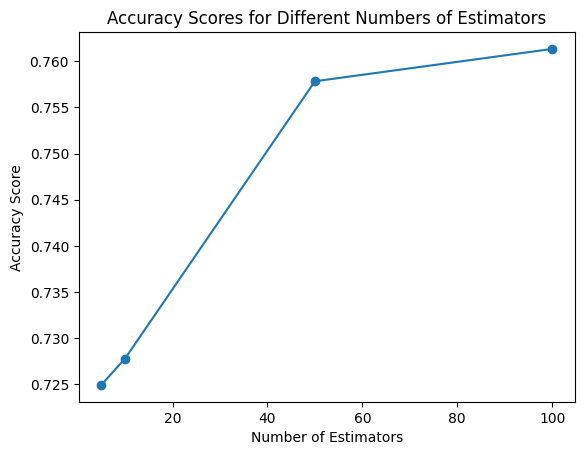

In [22]:
# Create lists of the number of estimators and the corresponding accuracy scores
num_est = list(num_ada_accuracy_scores.keys())
accuracy_scores = list(num_ada_accuracy_scores.values())

# Plot the accuracy scores as a line plot
plt.plot(num_est, accuracy_scores, marker='o')

# Add title and axis labels
plt.title('Accuracy Scores for Different Numbers of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')

# Show the plot
plt.show()